In [2]:
import pygame as pg
import sys
import random
import time

pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
# Initialize the pygame
pg.init()

# Screen attributes
width, height = 1280, 720
screen = pg.display.set_mode((width, height))
pg.display.set_caption('Minimarket Queue Simulation')

In [4]:
# Cashier logo
cashier_logo = pg.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pg.transform.scale(cashier_logo, (50, 50))

# Cart logo 
cart_logo = pg.image.load('./resource/cart_logo.png')
cart_logo_resized = pg.transform.scale(cart_logo, (50, 50))

In [5]:
padding = 50

In [14]:
cashier_positions_wd = [(padding + 0, height // 5 + 0),
                        (padding + 0, height // 5 + 200),
                        (padding + 0, height // 5 + 400)]

cashier_positions_we = [(padding + 0, height // 5 + 0), 
                        (padding + 0, height // 5 + 100), 
                        (padding + 0, height // 5 + 200), 
                        (padding + 0, height // 5 + 300), 
                        (padding + 0, height // 5 + 400)]

In [15]:
# Function to create customer (cart)
def createCustomer(order, cashier):
  screen.blit(cart_logo_resized, (padding + 100 * order, height // 5 + 100 * (cashier - 1)))

# Function to generate the cashier
def initCashier(day_type):
  available_cashier = []
  if day_type == 'weekday':
    screen.blit(cashier_logo_resized, cashier_positions_wd[0])
    screen.blit(cashier_logo_resized, cashier_positions_wd[1])
    screen.blit(cashier_logo_resized, cashier_positions_wd[2])
    
  elif day_type == 'weekend':
    screen.blit(cashier_logo_resized, (cashier_positions_we[0]))
    screen.blit(cashier_logo_resized, (cashier_positions_we[1]))
    screen.blit(cashier_logo_resized, (cashier_positions_we[2]))
    screen.blit(cashier_logo_resized, (cashier_positions_we[4]))
    screen.blit(cashier_logo_resized, (cashier_positions_we[5]))

In [16]:
def availableCashier(day_type):
  if day_type == 'weekday':
    available_cashier = [1, 3, 5]

  elif day_type == 'weekend':
    available_cashier = [1, 2, 3, 4, 5]

  return available_cashier

In [27]:
DAY_TYPE = 'weekday'
# DAY_TYPE = 'weekend'

In [28]:
avail_cashier = availableCashier(DAY_TYPE)
avail_cashier

[1, 3, 5]

In [29]:
"""
  This queue dict stores the queue for each available cashier
  Ex:
    queues = {
      1: [[1, 1632612354.5748718], [2, 1632612360.8748717]],
      2: [[1, 1632612362.1548715], [2, 1632612369.2548716], [3, 1632612376.3548713]]
    }
"""
queues = {cashier: [] for cashier in avail_cashier}
queues

{1: [], 3: [], 5: []}

In [25]:
def addCustomerToQueue(queues, day_type):
  if day_type == 'weekday':
    for i in range(60 // 60):
      for j in range(random.randint(5, 10)):  # Random number of customers
        what_cashier = random.choice(avail_cashier)
        serve_time = random.uniform(2, 5)  # Random serve time between 2 and 5 seconds
        # queues[what_cashier].append([len(queues[what_cashier]) + 1, serve_time])
        queues[what_cashier].append(serve_time)

  # elif day_type == 'weekend':
  #   for i in range(60 // 60):
  #     for j in range(random.randint(9, 20)):
  #       what_cashier = random.choice(avail_cashier)
  #       serve_time = random.uniform(2, 5)  # Random serve time between 2 and 5 seconds
  #       # queues[what_cashier].append([len(queues[what_cashier]) + 1, serve_time])
  #       queues[what_cashier].append(serve_time)

In [12]:
def moveQueue(queues, running_time):
  if len(queues) > 0:
    current_time = time.time()

    for cashier, serve_times in queues.items():
      serve_times.pop(0)
      queues.pop(0)



In [30]:
addCustomerToQueue(queues, DAY_TYPE)
queues

{1: [2.8663866877701984, 4.238424873721717],
 3: [3.0133816752347653, 2.973216291933658, 4.880301901685559],
 5: [4.528795999483419, 4.762977496263709]}

In [13]:

running = True
clock = pg.time.Clock()

while running:
    for event in pg.event.get():
        if event.type == pg.QUIT:
            running = False

    screen.fill((255, 255, 255))

    avail_cashier = initCashier('weekend')
    
    # Clear the screen
    # screen.fill((255, 255, 255))  # Fill the screen with white

    # for i in range(5):
    #    cashier = random.choice(avail_cashier)
    #    createCustomer(i, cashier)
       

    # createCustomer(1, 1)
    # createCustomer(1, 2)
    # createCustomer(2, 1)
    # createCustomer(2, 2)
    # createCustomer(3, 1)

    current_time = time.time()
    # for cashier, queue in queues.items():

    #   queues[cashier] = [customer for customer in queue if customer[1] > current_time]
    #   #  for order in queue:
    #       # createCustomer(order, cashier)

    #   for index, customer in enumerate(queue):
    #    order, _ = customer
    #    createCustomer(index + 1, cashier)
    
    for cashier, queue in queues.items():
      moveQueue(queue)
      for customer in queue:
        createCustomer(customer[0], cashier)

    # Update the display
    pg.display.flip()

    clock.tick(60)

pg.quit()
sys.exit()

SystemExit: 

/home/pwnwas/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Ini punya Hilmek

In [ ]:
# import pygame
# import sys
# import time
# import random

# # Inisialisasi Pygame
# pygame.init()

# # Ukuran layar
# screen_width = 1280
# screen_height = 720
# screen = pygame.display.set_mode((screen_width, screen_height))
# pygame.display.set_caption('Simulasi Antrian Kasir')

# # Cashier logo
# cashier_logo = pg.image.load('./resource/cashier_logo.png')
# cashier_logo_resized = pg.transform.scale(cashier_logo, (50, 50))

# # Cart logo 
# cart_logo = pg.image.load('./resource/cart_logo.png')
# cart_logo_resized = pg.transform.scale(cart_logo, (50, 50))

# # Warna
# WHITE = (255, 255, 255)
# BLACK = (0, 0, 0)
# GREEN = (0, 255, 0)
# RED = (255, 0, 0)

# # Ukuran kotak
# box_size = 40
# margin = 10

# # Font
# font = pygame.font.Font(None, 36)

# # Fungsi untuk menggambar kotak
# def draw_box(screen, color, x, y):
#     pygame.draw.rect(screen, color, (x, y, box_size, box_size))

# # Koordinat kasir dan pelanggan dalam grid
# cashiers = [(1, 0), (3, 0), (5, 0)]
# customers = [(1, 1), (3, 1), (5, 1), (1, 2), (3, 2), (5, 2), (1, 3), (3, 3), (5, 3), (1, 4), (5, 4)]

# # Dictionary untuk menyimpan total waktu pelayanan dan perubahan waktu inkremental yang dilayani tiap kasir
# cashier_service_time = {cashier: {'total_time': 0, 'incremental_time': 0} for cashier in cashiers}

# # Fungsi untuk menambah pelanggan baru secara acak
# def add_customer():
#     # Jumlah baris dan kolom di grid
#     rows = 5
#     cols = [1, 3, 5]  # Hanya kolom 1, 3, dan 5 yang diizinkan
#     # Pilih koordinat acak untuk pelanggan baru
#     new_customer = (random.choice(cols), rows)
#     customers.append(new_customer)

# # Fungsi utama
# def main():
#     clock = pygame.time.Clock()
#     serving_time = 1000  # 4 detik dalam milidetik
#     last_move_time = pygame.time.get_ticks()
#     add_customer_time = 2000  # Tambah pelanggan setiap 2 detik
#     last_add_time = pygame.time.get_ticks()
#     max_customers = 30  # Maksimal 30 pelanggan

#     while True:
#         for event in pygame.event.get():
#             if event.type == pygame.QUIT:
#                 pygame.quit()
#                 sys.exit()

#         # Hitung waktu sekarang
#         current_time = pygame.time.get_ticks()

#         # Tambah pelanggan baru secara acak jika belum mencapai batas maksimal
#         if len(customers) < max_customers and current_time - last_add_time >= add_customer_time:
#             add_customer()
#             last_add_time = current_time

#         # Jika 1 detik telah berlalu, pindahkan antrian
#         if current_time - last_move_time >= serving_time:
#             last_move_time = current_time
#             if customers:
#                 customer_served = customers.pop(0)  # Hapus pelanggan yang dilayani
#                 for cashier in cashiers:
#                     if cashier[0] == customer_served[0]:  # Cek kasir yang melayani pelanggan tersebut
#                         cashier_service_time[cashier]['incremental_time'] += serving_time / 1000  # Tambah waktu layanan ke total waktu pelayanan kasir
#                         cashier_service_time[cashier]['total_time'] += serving_time / 1000  # Tambah waktu layanan ke total waktu pelayanan kasir

#                 for i in range(len(customers)):
#                     x, y = customers[i]
#                     # Pindahkan pelanggan satu langkah ke depan dalam antrian
#                     if y > 1:
#                         customers[i] = (x, y - 1)

#         screen.fill(WHITE)

#         # Gambar kasir
#         for cashier in cashiers:
#             x = cashier[0] * (box_size + margin)
#             y = cashier[1] * (box_size + margin)
#             draw_box(screen, GREEN, x, y)

#         # Gambar pelanggan
#         for customer in customers:
#             x = customer[0] * (box_size + margin)
#             y = customer[1] * (box_size + margin)
#             draw_box(screen, RED, x, y)

#         # Tampilkan total waktu pelayanan pada pojok kanan layar
#         total_time_text = font.render("Total Service Time", True, BLACK)
#         screen.blit(total_time_text, (screen_width - 250, 20))
#         for i, (cashier, service_time) in enumerate(cashier_service_time.items()):
#             time_text = font.render(f"Cashier {i+1}: {service_time['total_time']:.2f} seconds", True, BLACK)
#             screen.blit(time_text, (screen_width - 250, 60 + i * 30))

#         pygame.display.flip()
#         clock.tick(30)

# if __name__ == "__main__":
#     main()


SystemExit: 

In [33]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo 
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0, 0, 0]

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer():
    # Jumlah baris dan kolom di grid
    rows = 5
    cols = [1, 3, 5]  # Hanya kolom 1, 3, dan 5 yang diizinkan
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 50  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 14

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15 and (day_count % 7 == 1 or day_count % 7 == 2 or day_count % 7 == 3 or day_count % 7 == 4 or day_count % 7 == 5):
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
            cashier = [(1, 0), (3, 0), (5, 0)]
        elif day_count <= 15 and (day_count % 7 == 6 or day_count % 7 == 0):
            item_distribution = [0.3, 0.7]
            cashier = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
        if day_count >= 16 and (day_count % 7 == 1 or day_count % 7 == 2 or day_count % 7 == 3 or day_count % 7 == 4 or day_count % 7 == 5):
            item_distribution = [0.8, 0.2]
            cashier = [(1, 0), (3, 0), (5, 0)]
        else:
            item_distribution = [0.8, 0.2]  # 1-5 items: 80%, 5-10 items: 20%
            cashier = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(30, 50)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer()
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        if front_customer in [(1, 1), (3, 1), (5, 1)]:
                            cashier_index = cashiers.index((front_customer[0], 0))
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                text1 = font.render(f'Cashier 1: {total_serving_time[0] // 1000} s', True, BLACK)
                text2 = font.render(f'Cashier 2: {total_serving_time[1] // 1000} s', True, BLACK)
                text3 = font.render(f'Cashier 3: {total_serving_time[2] // 1000} s', True, BLACK)

                screen.blit(text1, (screen_width - text1.get_width() - 10, screen_height - text3.get_height() - text2.get_height() - text1.get_height() - 50))
                screen.blit(text2, (screen_width - text2.get_width() - 10, screen_height - text3.get_height() - text2.get_height() - 30))
                screen.blit(text3, (screen_width - text3.get_width() - 10, screen_height - text3.get_height() - 20))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

if __name__ == "__main__":
    main()


SystemExit: 

In [35]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo 
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris dan kolom di grid
    rows = 5
    weekday_cols = [1, 3, 5]  # Hanya kolom 1, 3, dan 5 yang diizinkan
    weekend_cols = [1, 2, 3, 4, 5]  # Hanya kolom 1, 3, dan 5 yang diizinkan
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 50  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 5

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.8, 0.2]  # 1-5 items: 80%, 5-10 items: 20%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count % 7)
        if day_of_week in [6, 0]:  # Sabtu (6) dan Minggu (0)
            cashiers = weekend_cashiers
            num_cashiers = 5
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(30, 50)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([1, 3, 5])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        if front_customer in [(1, 1), (3, 1), (5, 1), (2, 1), (4, 1)]:
                            cashier_index = cashiers.index((front_customer[0], 0))
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                text1 = font.render(f'Cashier 1: {total_serving_time[0] // 1000} s', True, BLACK)
                text2 = font.render(f'Cashier 2: {total_serving_time[1] // 1000} s', True, BLACK)
                text3 = font.render(f'Cashier 3: {total_serving_time[2] // 1000} s', True, BLACK)
                screen.blit(text1, (screen_width - text1.get_width() - 10, screen_height - text3.get_height() - text2.get_height() - text1.get_height() - 50))
                screen.blit(text2, (screen_width - text2.get_width() - 10, screen_height - text3.get_height() - text2.get_height() - 30))
                screen.blit(text3, (screen_width - text3.get_width() - 10, screen_height - text3.get_height() - 20))

                # Tambahkan info untuk kasir ke-4 dan ke-5 jika akhir pekan
                if num_cashiers == 5:
                    text4 = font.render(f'Cashier 4: {total_serving_time[3] // 1000} s', True, BLACK)
                    text5 = font.render(f'Cashier 5: {total_serving_time[4] // 1000} s', True, BLACK)
                    screen.blit(text4, (screen_width - text4.get_width() - 10, screen_height - text4.get_height() - 70))
                    screen.blit(text5, (screen_width - text5.get_width() - 10, screen_height - text5.get_height() - 90))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

if __name__ == "__main__":
    main()


SystemExit: 

In [ ]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo 
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0, 0, 0]

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris dan kolom di grid
    rows = 5
    # cols = [1, 3, 5]  # Hanya kolom 1, 3, dan 5 yang diizinkan
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 50  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 14

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15 and (day_count % 7 == 1 or day_count % 7 == 2 or day_count % 7 == 3 or day_count % 7 == 4 or day_count % 7 == 5):
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
            cashier = [(1, 0), (3, 0), (5, 0)]
            customer_position = [1, 3, 5]
        elif day_count <= 15 and (day_count % 7 == 6 or day_count % 7 == 0):
            item_distribution = [0.3, 0.7]
            cashier = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
            customer_position = [1, 2, 3, 4, 5]
        if day_count >= 16 and (day_count % 7 == 1 or day_count % 7 == 2 or day_count % 7 == 3 or day_count % 7 == 4 or day_count % 7 == 5):
            item_distribution = [0.8, 0.2]
            cashier = [(1, 0), (3, 0), (5, 0)]
            customer_position = [1, 3, 5]
        else:
            item_distribution = [0.8, 0.2]  # 1-5 items: 80%, 5-10 items: 20%
            cashier = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
            customer_position = [1, 2, 3, 4, 5]

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(30, 50)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer(customer_position)
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        if front_customer in [(1, 1), (3, 1), (5, 1)]:
                            cashier_index = cashiers.index((front_customer[0], 0))
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                text1 = font.render(f'Cashier 1: {total_serving_time[0] // 1000} s', True, BLACK)
                text2 = font.render(f'Cashier 2: {total_serving_time[1] // 1000} s', True, BLACK)
                text3 = font.render(f'Cashier 3: {total_serving_time[2] // 1000} s', True, BLACK)

                screen.blit(text1, (screen_width - text1.get_width() - 10, screen_height - text3.get_height() - text2.get_height() - text1.get_height() - 50))
                screen.blit(text2, (screen_width - text2.get_width() - 10, screen_height - text3.get_height() - text2.get_height() - 30))
                screen.blit(text3, (screen_width - text3.get_width() - 10, screen_height - text3.get_height() - 20))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

if __name__ == "__main__":
    main()

# **CP 1**

In [42]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

"""
    This dict is for storing the average serving time for each day
    average_total_time_dict = {
        1: ...,
        2: ...,
        ...
        29: ...,
        30: ...
    }
"""
average_total_time_dict = {}

"""
    This dict if for storing the average customer for each day
    average_total_custoner_dict = {
        1: ...,
        2: ...,
        ...,
        29: ...,
        30: ...
    }
"""
average_total_customer_dict = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 50  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 12

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(30, 50)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

if __name__ == "__main__":
    main()


SystemExit: 

/home/pwnwas/miniconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [41]:
total_serving_time = [0] * 5
total_serving_time

[0, 0, 0, 0, 0]

# **CP 2**

In [43]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionaries to store average serving time and customer count per day
average_total_time_dict = {}
average_total_customer_dict = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 20  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 10:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 5:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)

        total_customers_served = 0
        total_time_served = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(30, 50)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            serving_time_per_customer = 0
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item
                                serving_time_per_customer += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani
                            total_customers_served += 1
                            total_time_served += serving_time_per_customer

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

        # Hitung rata-rata waktu pelayanan dan jumlah pelanggan per hari
        average_time = total_time_served / total_customers_served if total_customers_served > 0 else 0
        average_total_time_dict[day_count] = average_time
        average_total_customer_dict[day_count] = total_customers_served

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    print("Average Serving Time per Day:", average_total_time_dict)
    print("Average Customers per Day:", average_total_customer_dict)

if __name__ == "__main__":
    main()


Average Serving Time per Day: {1: 2197.824493863225, 2: 2156.7862837017014, 3: 2138.8758061473527, 4: 2034.5793623797103, 5: 2216.652317252525, 6: 2219.081300742133, 7: 2270.407268764219, 8: 2301.935744992379, 9: 2316.829777934661, 10: 2270.1494537509125}
Average Customers per Day: {1: 316, 2: 317, 3: 307, 4: 346, 5: 321, 6: 329, 7: 329, 8: 328, 9: 300, 10: 343}


# **Exp 1**: Different Cashier, Same Customer

In [47]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 30  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 10:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 5:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(30, 50)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


Average Serving Time per Day (seconds): {1: 1124.874205761093, 2: 1191.306244892972, 3: 1065.1501388294084, 4: 1144.8988829175555, 5: 1270.5093161977245, 6: 660.0257470183831, 7: 615.0498193556128, 8: 996.1578069487042, 9: 1030.775340950077, 10: 1092.8388529315037}
Average Customers Served per Day: {1: 115.66666666666667, 2: 117.0, 3: 112.33333333333333, 4: 109.0, 5: 125.66666666666667, 6: 67.8, 7: 60.0, 8: 102.66666666666667, 9: 96.33333333333333, 10: 105.33333333333333}


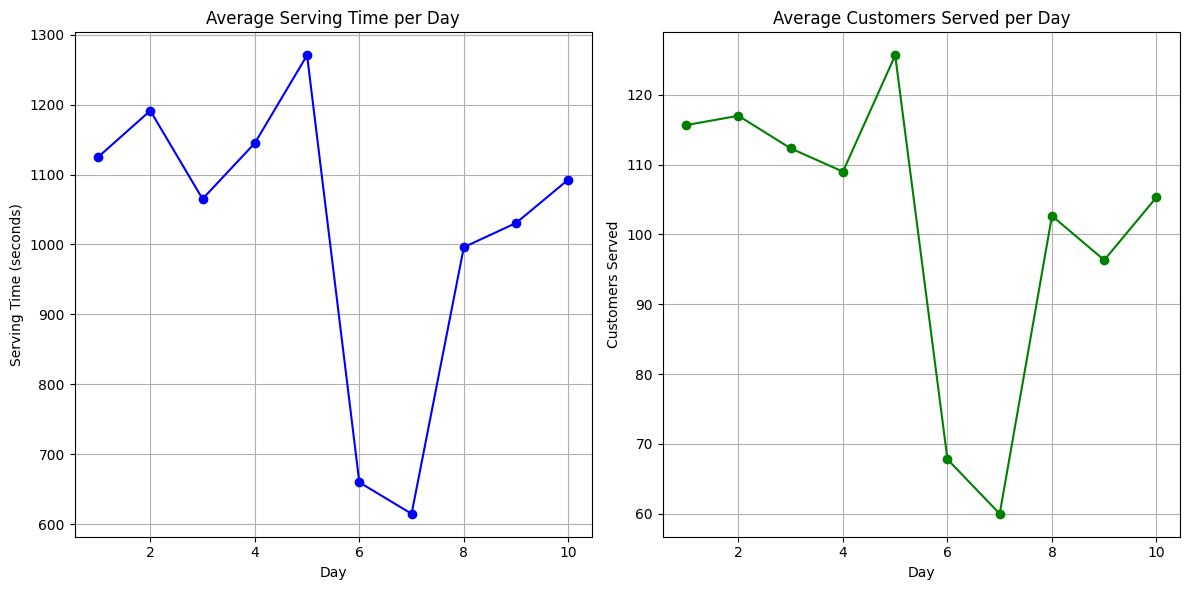

In [50]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **Exp 2**: Same Cashier, Different Customer

In [1]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
# weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
weekend_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 30  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 10:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 5:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (50, 80)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (30, 50)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(*max_customers_range)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 991.1967593048752, 2: 1011.5212521147145, 3: 976.2204875417216, 4: 959.6258065886726, 5: 1116.2711545951458, 6: 1136.7835712253584, 7: 1146.798967005304}
Average Customers Served per Day: {1: 110.0, 2: 112.33333333333333, 3: 103.33333333333333, 4: 104.33333333333333, 5: 112.66666666666667, 6: 110.33333333333333, 7: 105.66666666666667}


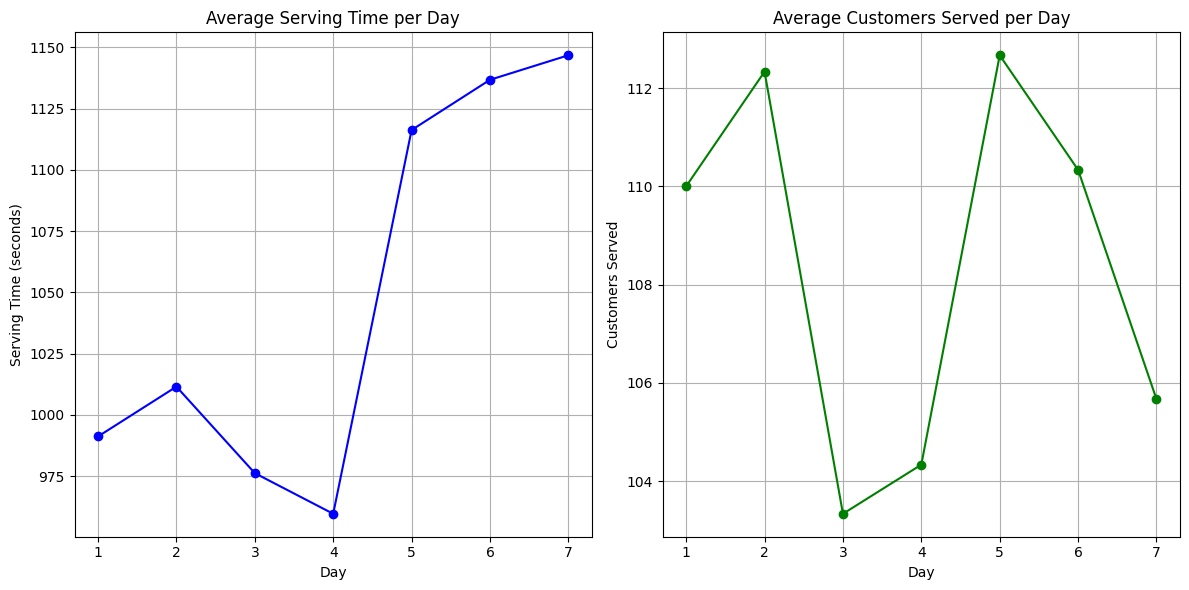

: 

In [2]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **Exp 3**: Different Cashier, Different Customer

In [1]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 30  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 10:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 5:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
            max_customers_range = (50, 80)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (30, 50)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(*max_customers_range)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 1060.3151869474536, 2: 1064.0951775266192, 3: 1078.920935174628, 4: 996.4339010361865, 5: 1044.9481975850554, 6: 1099.4895123106246, 7: 1042.4340205146264, 8: 1209.0601514408943, 9: 1185.9355630095165, 10: 1101.0210399395687}
Average Customers Served per Day: {1: 105.0, 2: 104.66666666666667, 3: 111.33333333333333, 4: 105.33333333333333, 5: 106.33333333333333, 6: 99.6, 7: 98.0, 8: 111.66666666666667, 9: 118.66666666666667, 10: 104.0}


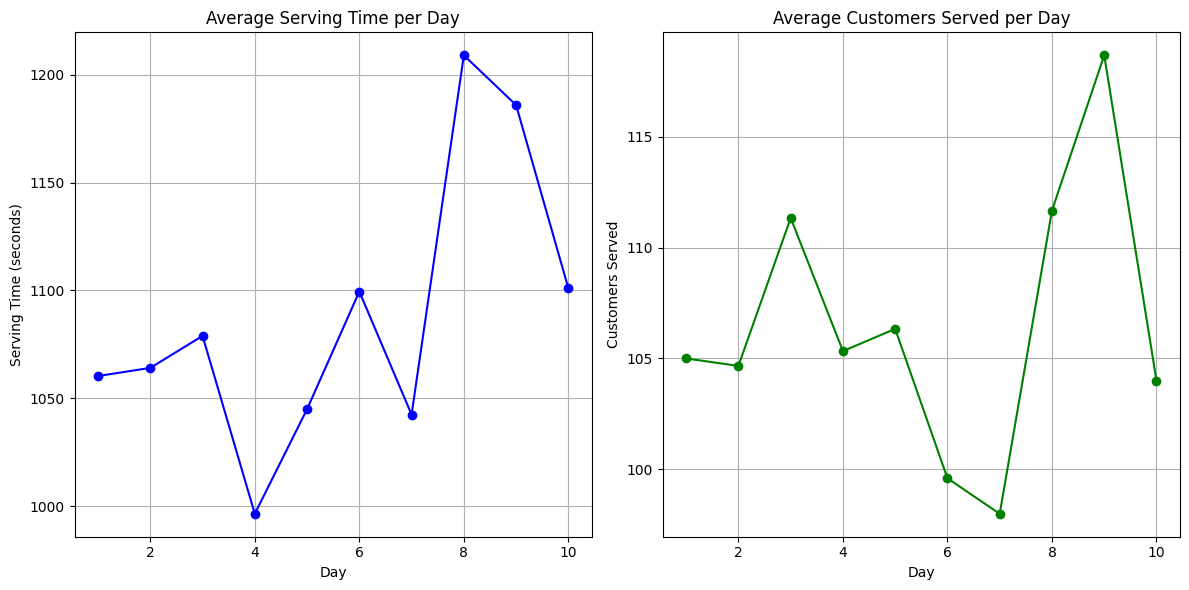

In [2]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()